In [39]:
# 1. Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
# 2. Membaca dataset
data = pd.read_csv("credits.csv")
print("Menampilkan 5 data teratas:\n", data.head())
print("\nInformasi tipe data:\n")
print(data.info())

Menampilkan 5 data teratas:
                                                 cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  

Informasi tipe data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-


Statistik Deskriptif:

                  id
count   45476.000000
mean   108345.997537
std    112443.796536
min         2.000000
25%     26443.250000
50%     60002.500000
75%    157302.000000
max    469172.000000


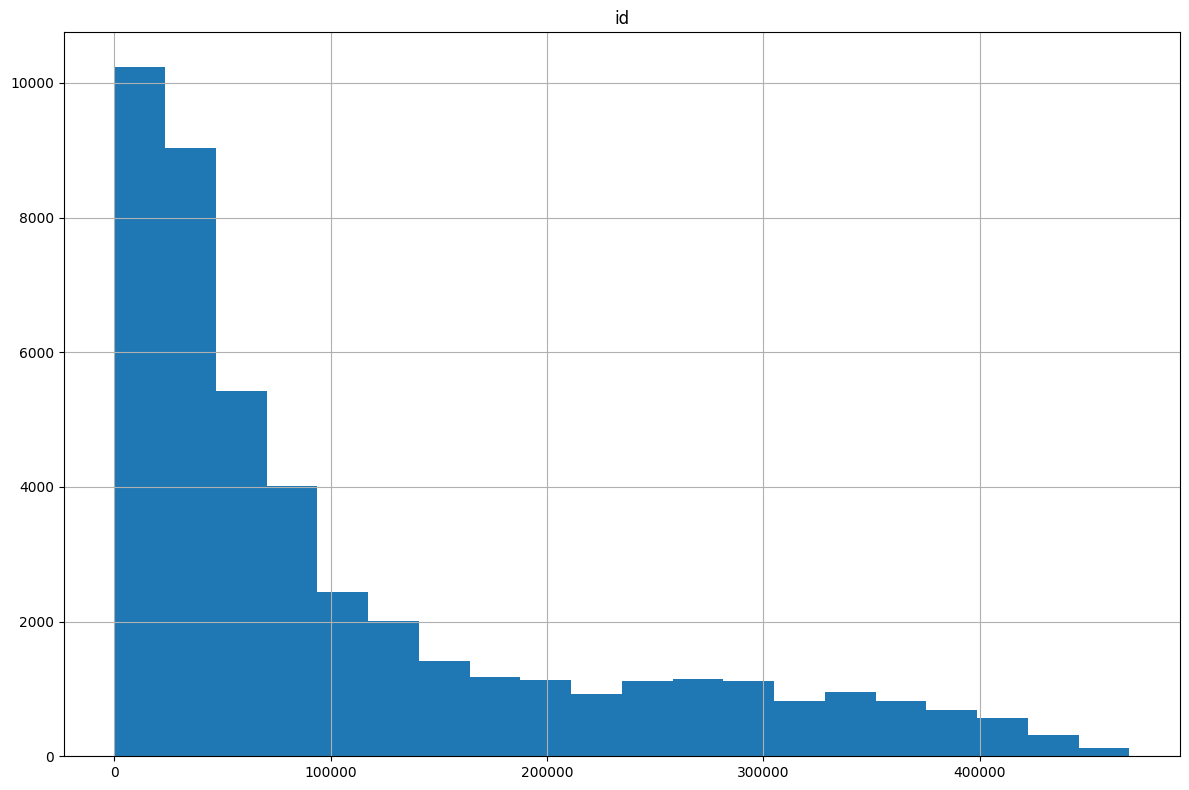

In [41]:
# 3. Eksplorasi Data Awal
print("\nStatistik Deskriptif:\n")
print(data.describe())

# Visualisasi distribusi setiap fitur numerik
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [42]:
# 4. Pra-pemrosesan Data
# Ambil hanya kolom numerik
data_numerik = data.select_dtypes(include=['float64', 'int64'])

# Normalisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerik)

In [43]:
# 5. Menentukan Jumlah Klaster Optimal dengan Metode Elbow
inertia = []
range_klaster = range(1, 11)

for k in range_klaster:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

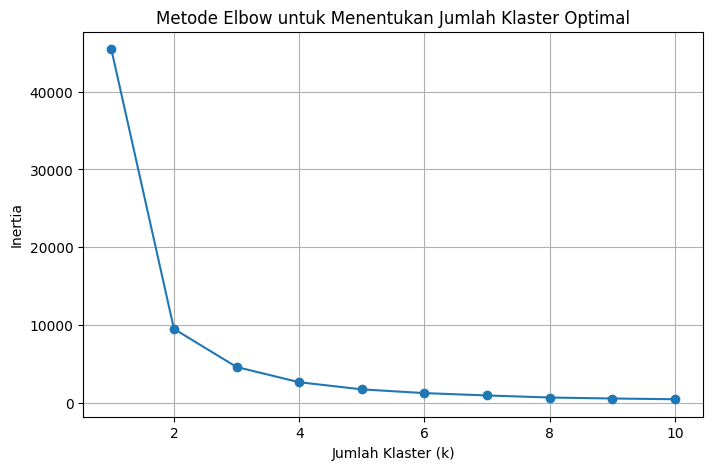

In [44]:
# Visualisasi grafik Elbow
plt.figure(figsize=(8,5))
plt.plot(range_klaster, inertia, marker='o', linestyle='-')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [45]:
# 6. Penerapan Algoritma K-Means
jumlah_klaster = 3  # Ganti sesuai hasil grafik elbow
kmeans = KMeans(n_clusters=jumlah_klaster, random_state=42)
labels = kmeans.fit_predict(data_scaled)

In [46]:
# Tambahkan kolom klaster ke dataframe asli
data['Klaster'] = labels

In [ ]:

# 7. Visualisasi Hasil Klaster (Menggunakan 2 Fitur Pertama)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data[data_numerik.columns[0]],
    y=data[data_numerik.columns[1]],
    hue=data['Klaster'],
    palette='Set1'
)
plt.title(f'Visualisasi Klaster berdasarkan {data_numerik.columns[0]} dan {data_numerik.columns[1]}')
plt.xlabel(data_numerik.columns[0])
plt.ylabel(data_numerik.columns[1])
plt.legend(title='Klaster')
plt.tight_layout()
plt.show()

In [56]:
# 8. Analisis Tiap Klaster
print("\nStatistik Rata-rata Tiap Klaster:\n")
print(data.groupby('Klaster').mean(numeric_only=True))


Statistik Rata-rata Tiap Klaster:

                    id
Klaster               
0        151000.969929
1        324615.735681
2         37440.848706
